In [18]:
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    SMALL_SIZE = 24
    MEDIUM_SIZE = 24
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    return ax

In [24]:
data_dir = 'testA'
map_dir = 'testB'
output_dir = '../colorectal2/testA'
if not os.path.exists(output_dir):
    os.system('mkdir -p {}'.format(output_dir))
fnames = os.listdir(data_dir)
images = []; maps = []
for fname in fnames:
    images.append(io.imread(data_dir+'/{}'.format(fname)))
    maps.append(io.imread(map_dir+'/{}'.format(fname)))

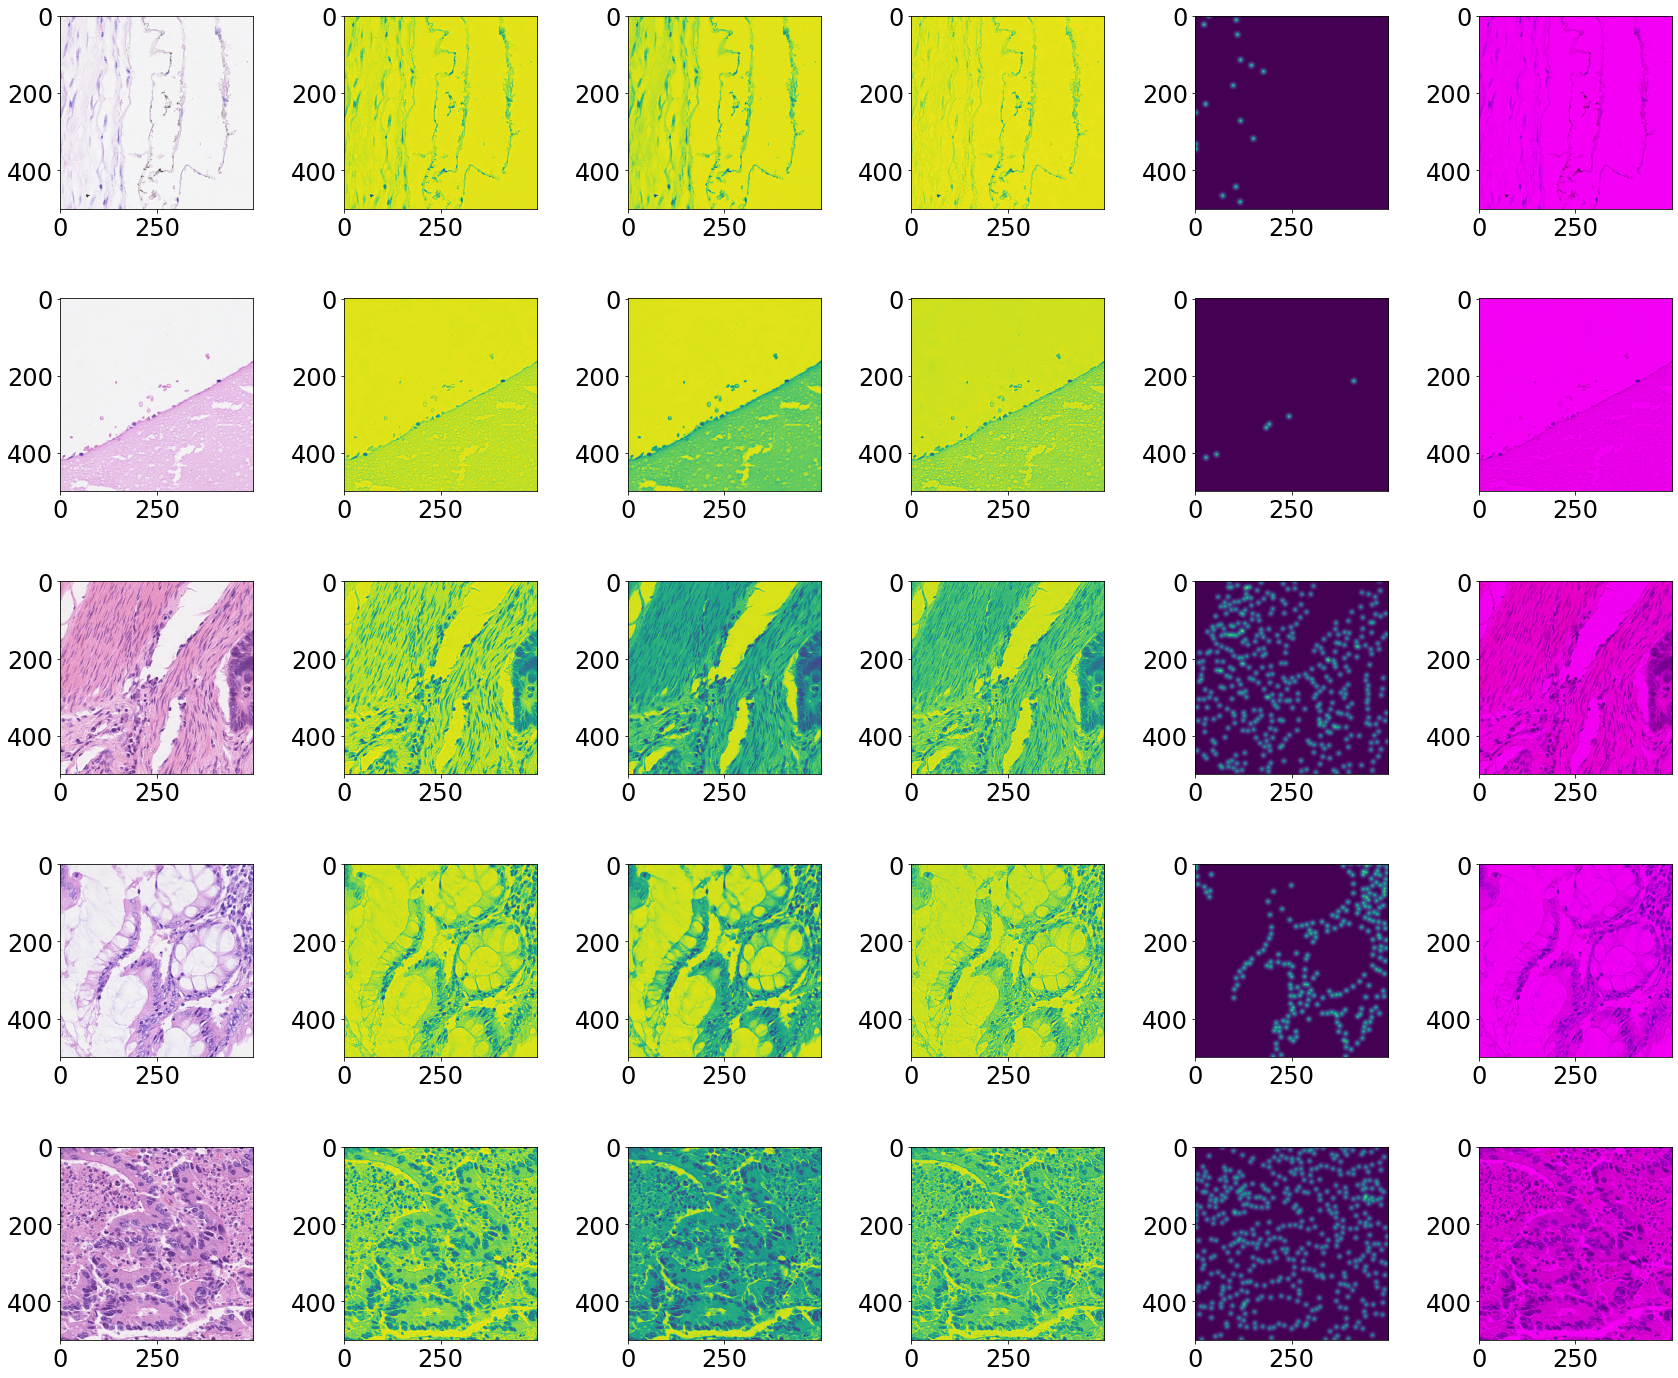

In [25]:
nb_images = 5
ax = get_ax(rows = nb_images, cols = 6, size = 4)
for i in range(nb_images):
    ax[i,0].imshow(images[i]); ax[i,1].imshow(images[i][:,:,0]); ax[i,2].imshow(images[i][:,:,1]); ax[i,3].imshow(images[i][:,:,2])
    ax[i,4].imshow(maps[i])
    ext_img = np.zeros(images[i].shape,dtype = np.uint8); ext_img[:,:,0] = images[i][:,:,0]; ext_img[:,:,2] = images[i][:,:,2]
    ax[i,5].imshow(ext_img)

In [27]:
for i, fname in enumerate(fnames):
    image = images[i][:,:,0]
    io.imsave(output_dir+'/{}'.format(fname), image)
images = np.stack(images); print(images.max())
xs = []
for i, fname in enumerate(fnames):
    x = io.imread(output_dir+'/{}'.format(fname)); xs.append(x)
xs = np.stack(xs)

255


In [28]:
print('Difference: {:.4f}'.format(np.abs(xs-images[:,:,:,0]).mean()))

Difference: 0.0000
